# Efficiency Plots for 2017 (High Et):

Check efficiency plots w.r.t the reference (noringer)

In [9]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import array
import root_numpy
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle,TCanvas,gPad,TGaxis
import ROOT
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) Read all files:

In [10]:
output_path = 'output/emulation'
mkdir_p(output_path)
version = 'v8'

In [11]:
# create my chain
chains = [
            Chain( "HLT_e17_lhvloose_nod0_noringer_L1EM15VHI", L1Seed = 'L1_EM15VHI' ),
            Chain( "HLT_e28_lhtight_nod0_noringer_ivarloose", L1Seed = 'L1_EM22VHI' ),
            Chain( "HLT_e60_lhmedium_nod0_noringer_L1EM24VHI", L1Seed = 'L1_EM24VHI' ),
            Chain( "HLT_e140_lhloose_nod0_noringer" , L1Seed = 'L1_EM24VHI' ),
    
            Chain( "HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI"%version, L1Seed = 'L1_EM15VHI' , 
                  l2calo_column = 'ringer_%s_vloose'%version),
            Chain( "HLT_e28_lhtight_nod0_ringer_%s_ivarloose"%version, L1Seed = 'L1_EM22VHI' , 
                  l2calo_column = 'ringer_%s_tight'%version ),
            Chain( "HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI"%version, L1Seed = 'L1_EM24VHI' , 
                  l2calo_column = 'ringer_%s_medium'%version),
            Chain( "HLT_e140_lhloose_nod0_ringer_%s"%version , L1Seed = 'L1_EM24VHI', 
                  l2calo_column = 'ringer_%s_loose'%version),

]

def emulate( df ):
    for chain in progressbar(chains, prefix='Emulate...'):
        chain.apply(df)

OrderedDict([('L1Seed', 'L1_EM15VHI'),
             ('L2Calo', (14000.0, 'trig_L2_cl_vloose_et12to22')),
             ('L2', 'trig_L2_el_cut_pt15to20'),
             ('EFCalo', 17000.0),
             ('HLT', (17000.0, 'trig_EF_el_lhvloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (25000.0, 'trig_L2_cl_tight_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 28000.0),
             ('HLT', (28000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM24VHI'),
             ('L2Calo', (57000.0, 'trig_L2_cl_medium_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt50toInf'),
             ('EFCalo', 60000.0),
             ('HLT', (60000.0, 'trig_EF_el_lhmedium'))])
OrderedDict([('L1Seed', 'L1_EM24VHI'),
             ('L2Calo', (137000.0, 'trig_L2_cl_loose_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt50toInf'),
             ('EFCalo', 140000.0),
             ('HLT', (140000.0, 'trig_EF_el_lhloose'))])
OrderedDic

In [12]:
dpath = '../data/output/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.dataframe.h5'

In [13]:
data_df = pd.concat( (load_hdf(dpath), 
                      load_hdf('output/emulation/data17_table_%s.h5'%version),
                     ), axis=1)

In [14]:
emulate(data_df)

Emulate...: 100%|██████████| 8/8 [02:45<00:00, 20.63s/it]


In [15]:
data_df.shape

(43311283, 131)

In [16]:
data_df.columns.values

array(['avgmu', 'trig_L2_cl_et', 'trig_L2_cl_eta', 'trig_L2_cl_phi',
       'trig_L2_cl_reta', 'trig_L2_cl_ehad1', 'trig_L2_cl_eratio',
       'trig_L2_cl_f1', 'trig_L2_cl_f3', 'trig_L2_cl_weta2',
       'trig_L2_cl_wstot', 'trig_EF_cl_et', 'trig_EF_el_et',
       'trig_EF_el_lhtight', 'trig_EF_el_lhmedium', 'trig_EF_el_lhloose',
       'trig_EF_el_lhvloose', 'el_et', 'el_eta', 'el_phi', 'el_rhad1',
       'el_rhad', 'el_f3', 'el_weta2', 'el_rphi', 'el_reta', 'el_wtots1',
       'el_eratio', 'el_f1', 'el_hastrack', 'el_d0', 'el_d0significance',
       'el_eProbabilityHT', 'el_deltaEta1', 'el_deltaPhi2Rescaled',
       'el_deltaPOverP', 'el_lhtight', 'el_lhmedium', 'el_lhloose',
       'el_lhvloose', 'trig_EF_el_lhtight_ivarloose', 'el_TaP_deltaR',
       'L1_EM3', 'L1_EM7', 'L1_EM15VH', 'L1_EM15VHI', 'L1_EM20VH',
       'L1_EM20VHI', 'L1_EM22VH', 'L1_EM22VHI', 'L1_EM24VHI',
       'trig_L2_cl_vloose_et0to12', 'trig_L2_cl_vloose_et12to22',
       'trig_L2_cl_vloose_et22toInf', 'trig_L2_

## Make plots:

In [17]:
etbins    = [0.,2.,4.,6.,8.,10.,12.,14.,16.,18.,20.,22.,24.,26.,28.,
             30.,32.,34.,36.,38.,40.,42.,44.,46.,48.,50.,55.,60.,65.,70.,100.]
step      = 200
etbins.extend( np.arange(200, 800+step, step=step).tolist() )

etbins_ext = [100., 120., 140., 160., 180., 200.]
step      = 200
etbins_ext.extend( np.arange(200, 800+step, step=step).tolist() )

In [18]:
def hist1d( name, values, bins, density=False ):
    H, _ = np.histogram(values, bins=bins, density=density )
    hist = ROOT.TH1F( name, '', len(bins)-1, array.array('d',bins))
    root_numpy.array2hist(H, hist)
    return hist

def get_profile( df, trigger, bins, target, etcut, pidname=None ):
    if pidname:
        num = df.loc[(df[trigger]==True) & (df['el_et']/1000 >= etcut) & (df['target']==target) &
                   (df[pidname]==True)]['el_et'].values/1000 
        den = df.loc[(df[pidname]==True) & (df['target']==target) & 
                     (df['el_et']/1000 >= etcut)]['el_et'].values/1000
    else:
        num = df.loc[(df[trigger]==True) & (df['el_et']/1000 >= etcut) & (df['target']==target)
                     ]['el_et'].values/1000 
        den = df.loc[(df['target']==target) & (df['el_et']/1000 >= etcut)]['el_et'].values/1000     
        
    h_num = hist1d('et_num', num, bins )
    h_den = hist1d('et_den', den, bins )
    h_eff = rpl.hist1d.divide(h_num,h_den)  
    return h_eff

def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

## Check EGAM1 Efficiency:

In [19]:
hists = [
        get_profile(data_df, 'HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version,etbins, 1, 23, 'el_lhtight'),
        get_profile(data_df, 'HLT_e28_lhtight_nod0_noringer_ivarloose',etbins, 1, 23, 'el_lhtight'),
        ]

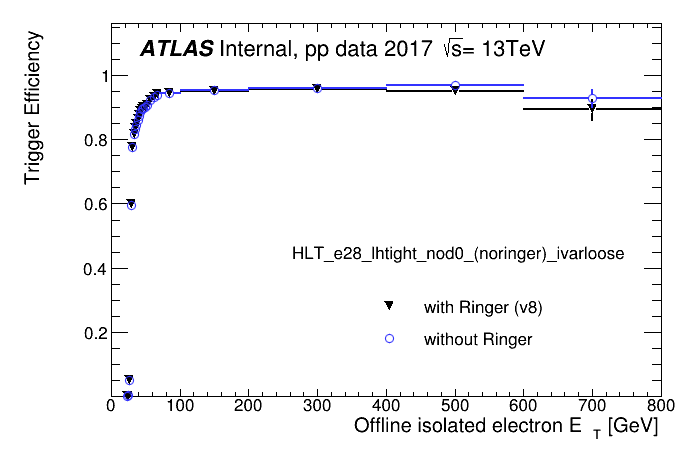

In [20]:
colors = [kBlack,kBlue-4, kBlue-9]
markers = [23, 24, 8]
fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.51,0.25,['with Ringer (%s)'%version,'without Ringer'] )
rpl.add_text( 0.42, 0.45, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
#fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_and_noringer_2017_HLT_high_et.pdf'%version)

In [45]:
hists = [
        get_profile(data_df, "HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI"%version,etbins, 1, 57, 'el_lhmedium'),
        get_profile(data_df, "HLT_e60_lhmedium_nod0_noringer_L1EM24VHI",etbins, 1, 57, 'el_lhmedium'),
        ]

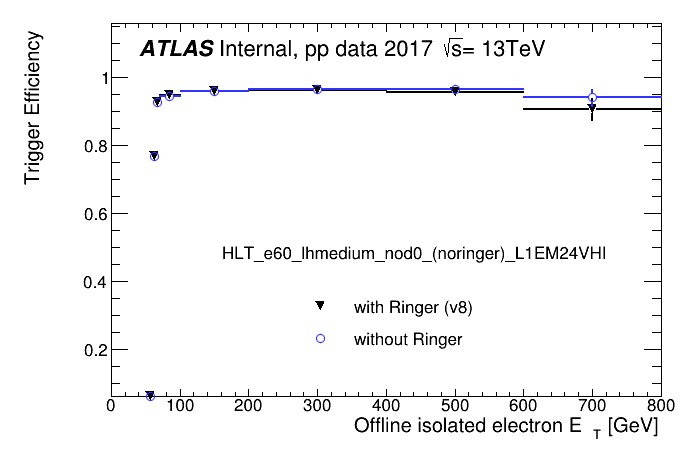

In [48]:
colors = [kBlack,kBlue-4, kBlue-9]
markers = [23, 24, 8]
fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.41,0.25,['with Ringer (%s)'%version,'without Ringer'] )
rpl.add_text( 0.32, 0.45, 'HLT_e60_lhmedium_nod0_(noringer)_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
#fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_and_noringer_2017_HLT_high_et.pdf'%version)

In [66]:
hists = [
        get_profile(data_df, "HLT_e140_lhloose_nod0_ringer_%s"%version,etbins_ext, 1, 135, 'el_lhloose'),
        get_profile(data_df, "HLT_e140_lhloose_nod0_noringer",etbins_ext, 1, 135, 'el_lhloose'),
        ]

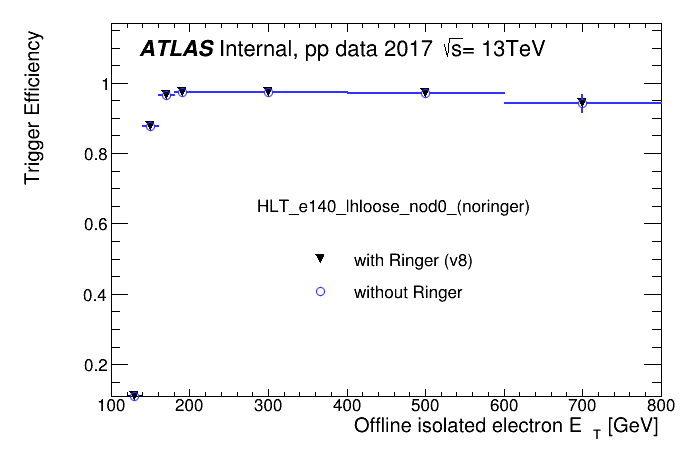

In [72]:
colors = [kBlack,kBlue-4, kBlue-9]
markers = [23, 24, 8]
fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.41,0.35,['with Ringer (%s)'%version,'without Ringer'] )
rpl.add_text( 0.37, 0.55, "HLT_e140_lhloose_nod0_(noringer)", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
#fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_and_noringer_2017_HLT_high_et.pdf'%version)

### Check EGAM7 Rejection:

In [76]:
hists = [
        get_profile(data_df, 'L2Calo_e28_lhtight_nod0_ringer_%s_ivarloose'%version,etbins, 0, 23),
        get_profile(data_df, 'L2Calo_e28_lhtight_nod0_noringer_ivarloose',etbins, 0, 23),
        ]

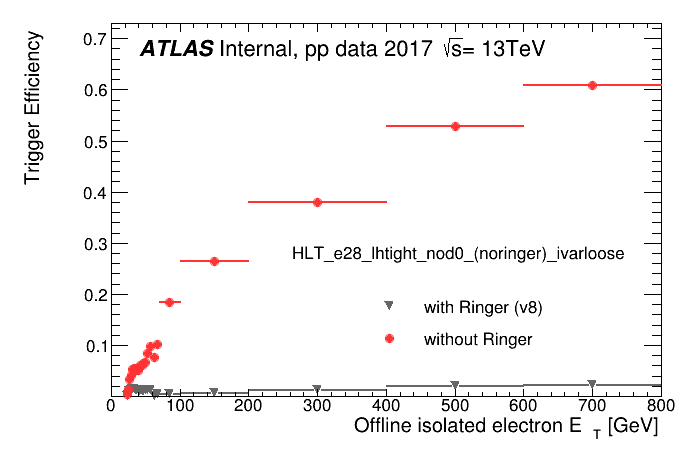

In [78]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.51,0.25,['with Ringer (%s)'%version,'without Ringer'] )
rpl.add_text( 0.42, 0.45, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
#fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_and_noringer_2017_HLT_high_et.pdf'%version)